# 꽃잎의 길이 값 예측하기
- 데이터셋:iris.csv
- 목적: 꽃입의 길이값 예측
- 피쳐: 3개
- 타겟: 1개
- 학습방법: 지도학습 - 회귀
- 알고리즘: LinearRegression

[1] 모듈 준비

In [164]:
# 모듈 로딩
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

[2] 데이터 준비

In [165]:
iris = load_iris(as_frame = True)


In [166]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [167]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [168]:
iris_DF= pd.DataFrame(iris['data'], columns=iris['feature_names'])

In [169]:
iris_DF['target'] = iris['target']

In [170]:
mask = (iris_DF['target']==2)
virginica_DF = iris_DF[mask]

In [171]:
virginica_DF=virginica_DF.drop(columns=['target'])

In [172]:
virginica_DF.reset_index(inplace=True, drop=True)

[2-2] 결측치 확인

In [173]:
virginica_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  50 non-null     float64
 1   sepal width (cm)   50 non-null     float64
 2   petal length (cm)  50 non-null     float64
 3   petal width (cm)   50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


[2-3] 이상치 확인

In [174]:
virginica_DF.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


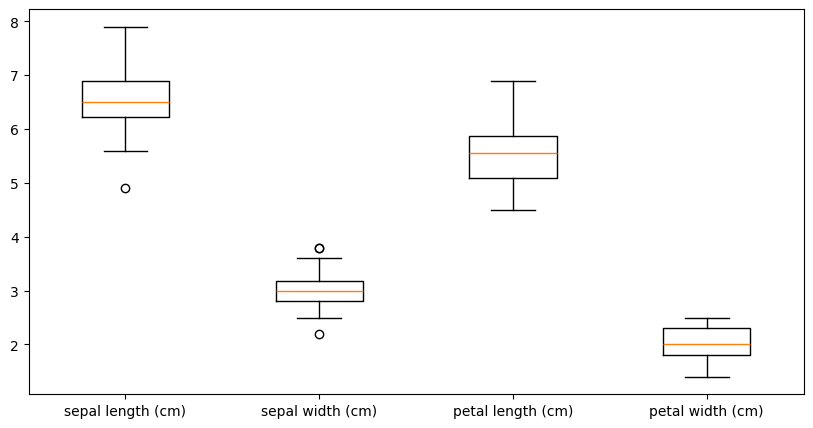

In [175]:
# 박스플롯
plt.figure(figsize = (10, 5))
plt.boxplot(virginica_DF.iloc[:, :4])
plt.xticks(np.arange(1, 5), virginica_DF.columns[:4])
plt.show()

[3] 상관관계 분석

In [176]:
virginica_DF.corr(numeric_only=True)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.457228,0.864225,0.281108
sepal width (cm),0.457228,1.000000,0.401045,0.537728
petal length (cm),0.864225,0.401045,1.000000,0.322108
petal width (cm),0.281108,0.537728,0.322108,1.000000


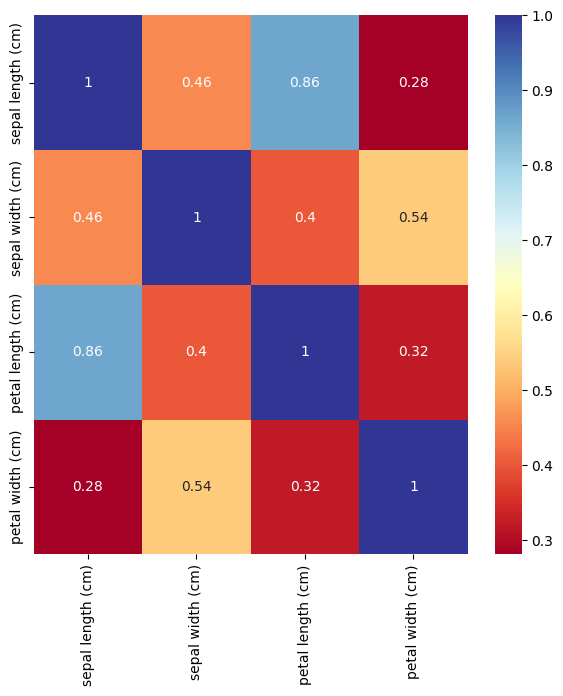

In [177]:
plt.figure(figsize=(7,7))
g = sns.heatmap(virginica_DF.corr(), annot=True, cmap='RdYlBu')

[4] 탐색적분석

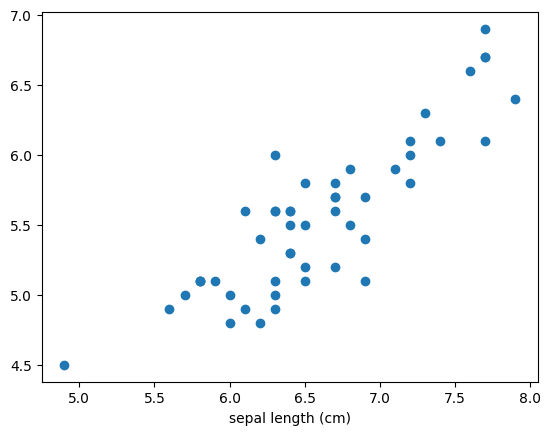

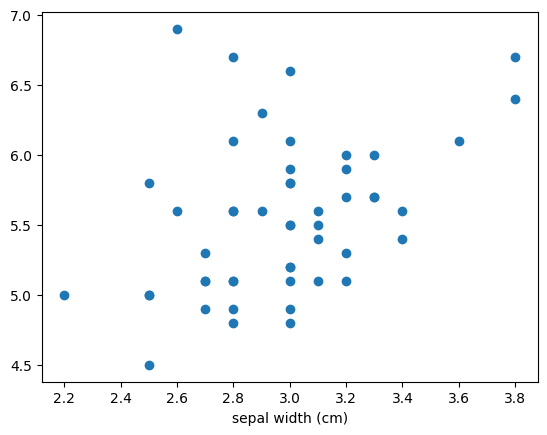

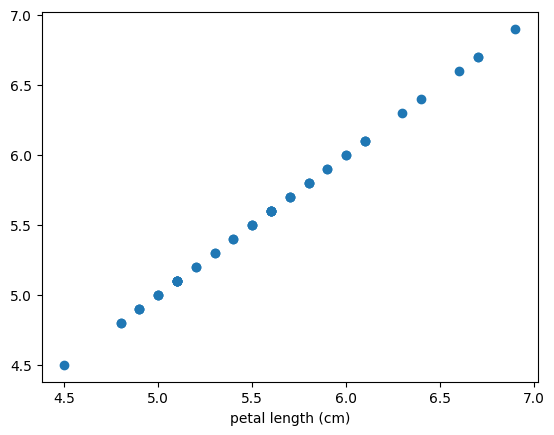

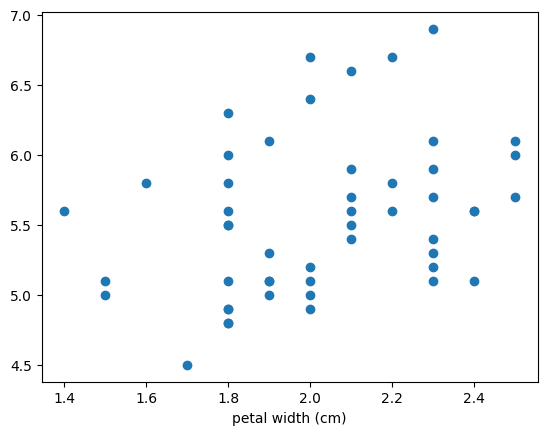

In [178]:
for i in virginica_DF.columns:
    plt.scatter(virginica_DF[i],virginica_DF['petal length (cm)'])
    plt.xlabel(i)
    plt.show()

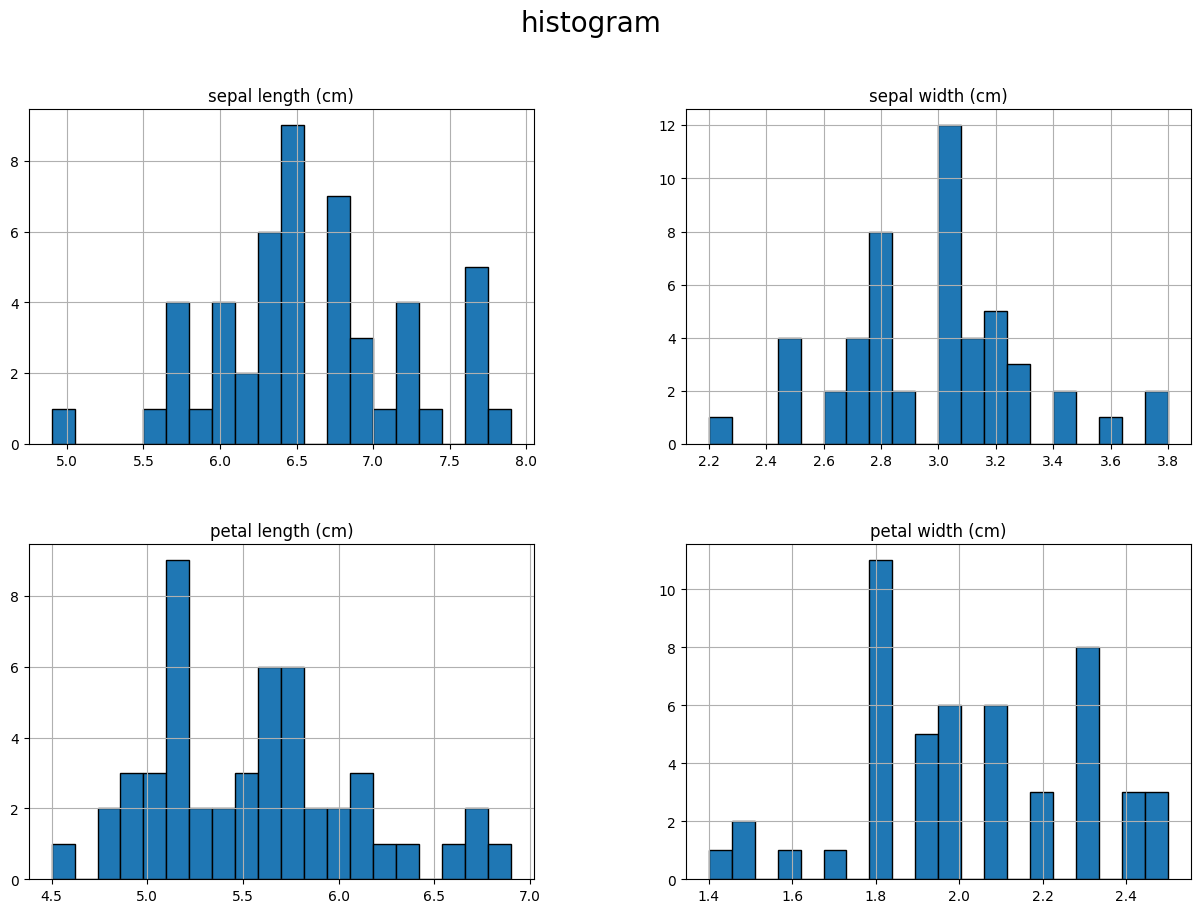

In [224]:
# 히스토그램
virginica_DF.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('histogram', fontsize=20)
plt.show()

[4] 학습준비

[4-1] 피쳐 타겟 설정

In [179]:
features = virginica_DF[['sepal length (cm)','sepal width (cm)']]
target = virginica_DF['petal length (cm)']

print(f'features : {features.shape}, {features.ndim}D')
print(f'target : {target.shape}, {target.ndim}D')

features : (50, 2), 2D
target : (50,), 1D


[4-2] 학습/테스트용 데이터셋 분리

In [180]:
# 비율 80:20
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

In [181]:
# train:test = 80:20 체크
print(f'X_train : {X_train.shape}, {X_train.ndim}D')
print(f'y_train : {y_train.shape}, {y_train.ndim}D')
print(f'X_test : {X_test.shape}, {X_test.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

X_train : (40, 2), 2D
y_train : (40,), 1D
X_test : (10, 2), 2D
y_test : (10,), 1D


[4-3] 피쳐 스케일링

In [182]:
from sklearn.preprocessing import MinMaxScaler

In [183]:
# 스케일러 인스턴스 생성
mmScaler=MinMaxScaler()

In [184]:
mmScaler.fit(X_train)

MinMaxScaler()

In [185]:
# 학습용, 테스트용 데이터셋 스케일링 진행
# 학습용 데이터 ==> 스케일링 ==> ndarray 타입 반환
X_train_scaled=mmScaler.transform(X_train)
X_train_scaled.shape, X_train_scaled.min(), X_train_scaled.max()

((40, 2), np.float64(0.0), np.float64(1.0))

In [186]:
# 테스트용 데이터 ==> 스케일링  ==> ndarray 타입 반환
X_test_scaled= mmScaler.transform(X_test)
X_test_scaled.shape, X_test_scaled.min(), X_test_scaled.max()

((10, 2), np.float64(-0.3043478260869561), np.float64(0.7826086956521738))

[5] 모델 생성

In [187]:
from sklearn.linear_model import LinearRegression

In [188]:
# 인스턴스 생성
model = LinearRegression()

In [189]:
# 학습 진행 -> 학습용 데이터셋
model.fit(X_train_scaled, y_train)

LinearRegression()

[6] 모델 평가

In [190]:
from sklearn.metrics import mean_squared_error, r2_score

In [191]:
print(f'테스트 결정계수: {model.score(X_test_scaled, y_test)}')

테스트 결정계수: 0.8159404066194869


In [192]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test_scaled)

# 모델의 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'mse : {mse}')
print(f'r2 : {r2}') 


mse : 0.04940159486332972
r2 : 0.8159404066194869


In [202]:
X_line = np.linspace(X_train_scaled.min(), X_train_scaled.max(), 100)
y_line = model.coef_[0]*X_line+model.intercept_

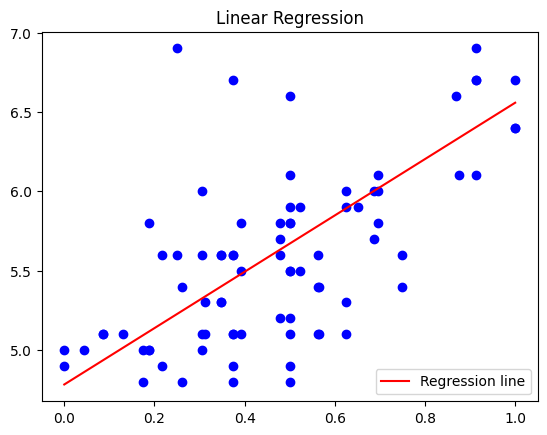

In [203]:
# 절편과 기울기를 이용해서 그리기
plt.plot(X_train_scaled, y_train, 'bo') # bo 블루 포인트
plt.plot(X_line, y_line, color='red', label='Regression line')
plt.title('Linear Regression')
plt.legend()
plt.show()

[7] 예측값 시각화

In [193]:
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

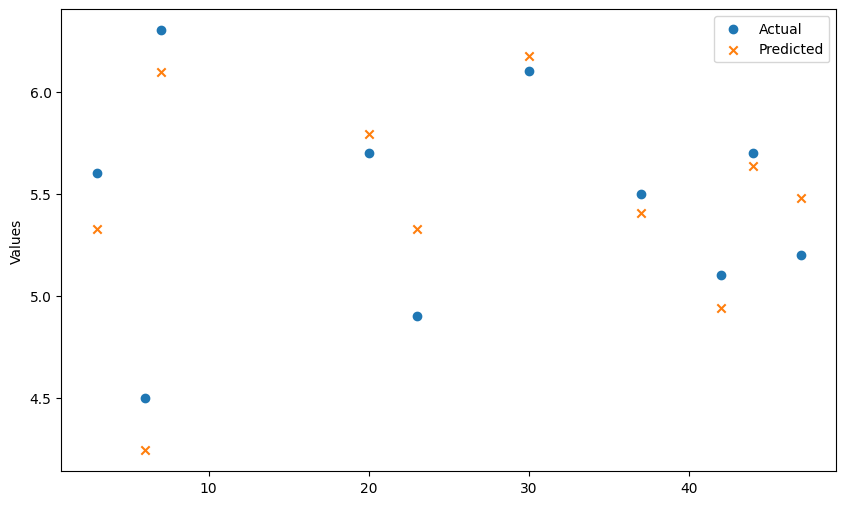

In [194]:
plt.figure(figsize=(10, 6))
plt.scatter(df_results.index, df_results['Actual'], label='Actual', marker='o')
plt.scatter(df_results.index, df_results['Predicted'], label='Predicted', marker='x')
plt.ylabel('Values')
plt.legend()
plt.show()

[8] 교차검증

In [204]:

from sklearn.model_selection import cross_val_predict,cross_val_score,cross_validate

In [216]:
#### cross_val_score
precict = cross_val_score(model,X_train_scaled,y_train,cv=5)

In [217]:

print(f'cv_score : {precict}')

cv_score : [ 0.538195    0.69470836  0.77577227  0.65179792 -0.93246044]


In [218]:
cv_results = cross_validate(model, X_train_scaled, y_train, cv=5, 
                            scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'),
                            return_train_score=True)

In [222]:
cv_results

{'fit_time': array([0.0009985 , 0.00202394, 0.00099015, 0.00099683, 0.00099754]),
 'score_time': array([0.00099707, 0.00096941, 0.00097251, 0.00099778, 0.00099683]),
 'test_r2': array([ 0.538195  ,  0.69470836,  0.77577227,  0.65179792, -0.93246044]),
 'train_r2': array([0.74234733, 0.71288324, 0.70404959, 0.71725863, 0.7764576 ]),
 'test_neg_mean_squared_error': array([-0.08074372, -0.15946718, -0.10983655, -0.03634359, -0.12289241]),
 'train_neg_mean_squared_error': array([-0.08492222, -0.06823229, -0.07597313, -0.09432075, -0.07806302]),
 'test_neg_mean_absolute_error': array([-0.24680456, -0.36417109, -0.28302058, -0.15456454, -0.26239354]),
 'train_neg_mean_absolute_error': array([-0.23707942, -0.19961345, -0.22551604, -0.25837944, -0.24428241])}

In [221]:
cv_r2 = cv_results['test_r2']
cv_mse = -cv_results['test_neg_mean_squared_error']  
cv_mae = -cv_results['test_neg_mean_absolute_error']  

print(f"Cross-validated R^2: {cv_r2.mean():.3f} (std: {cv_r2.std():.3f})")
print(f"Cross-validated MSE: {cv_mse.mean():.3f} (std: {cv_mse.std():.3f})")
print(f"Cross-validated MAE: {cv_mae.mean():.3f} (std: {cv_mae.std():.3f})")

Cross-validated R^2: 0.346 (std: 0.644)
Cross-validated MSE: 0.102 (std: 0.041)
Cross-validated MAE: 0.262 (std: 0.067)


[8-1] 잔차

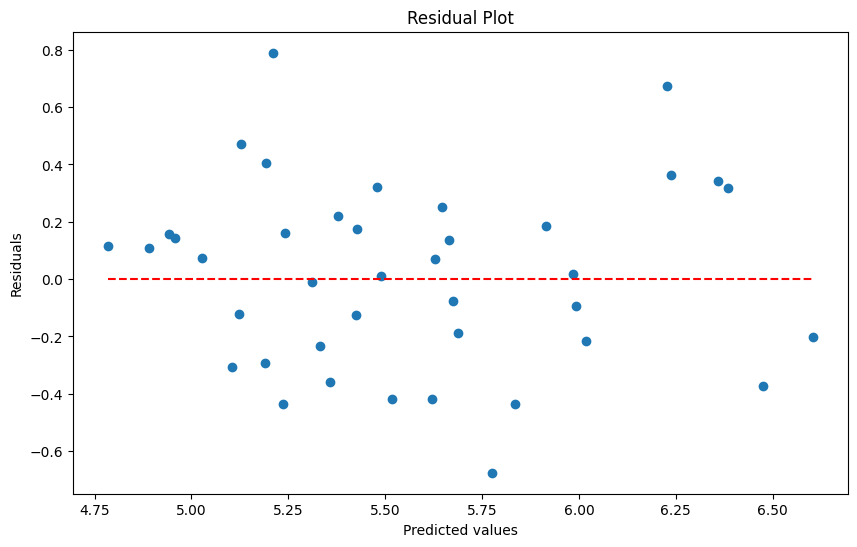

In [223]:
y_train_pred = cross_val_predict(model, X_train_scaled, y_train, cv=5)
residuals = y_train - y_train_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals)
plt.hlines(0, np.min(y_train_pred), np.max(y_train_pred), colors='r', linestyles='dashed')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
